# Tarea6, Inferencia estadística
GÓMEZ ESPINOSA VICTOR MANUEL

In [1]:
#Librerías necesarias
library(ggplot2) #plots
library("magrittr") #pipes
library(dplyr) #glimpse


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Problema 1 c)

[1] "3.04"


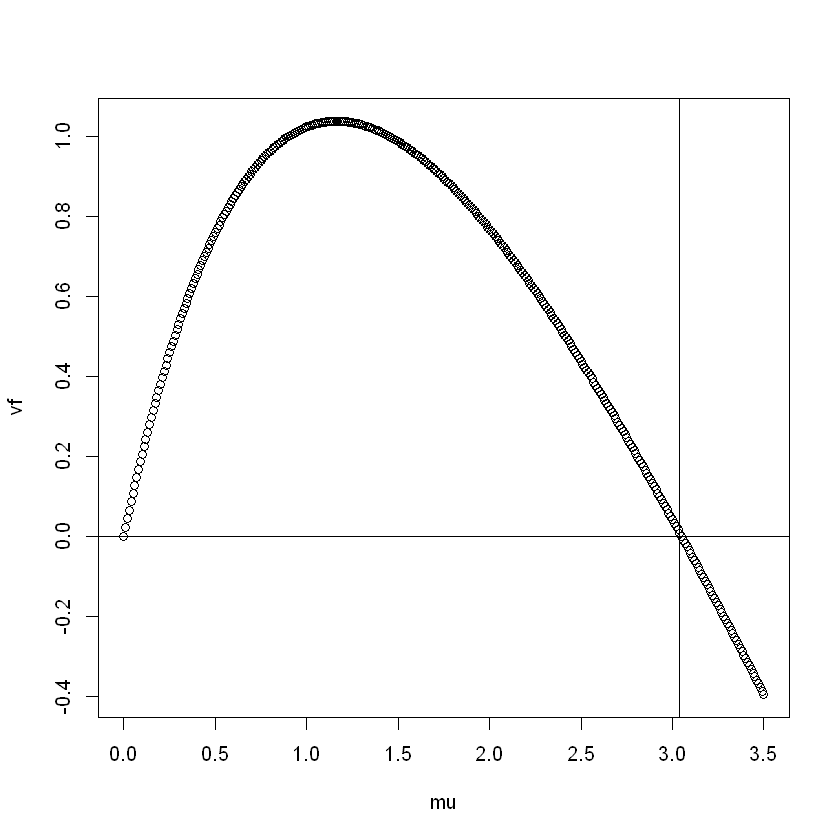

In [58]:
f<-function(mu){ #funcion
    xb<-3.2 #media
    (xb*(1-exp(-mu)))-mu #funcion del estimador menos el estimador
}


mu<-seq(from=0, to=3.5, by=.01) 
vf<-f(mu)

plot(mu,vf) #grafico de la funcion
abline(h=0)
abline(v=3.04)
print("3.04")

## Problema 10 c)

In [60]:
#datos
mu0<-1 #media
n<-20 #tamaño de la muestra
alfa<-0.05 #significancia
zalfa2<-abs(qnorm(0.025,0,1)) #z para alfa/2

#tasa de error de tipo 1
fx2<-replicate(10000, { #repite el siguiente exprimento 10^4 veces
    
    m<-rpois(n,mu0) #muestra de tamaño 20 de una possion con parametro 1
    xbar<-mean(m)   #media muestral
    z<-(sqrt(n)*(xbar-mu0))/sqrt(mu0) #estadìstico de prueba

    #cae en la region de rechazo?
    abs(z)>zalfa2
})

v<-table(fx2) 
vf<-v/10000   #obtiene las frecuencias
cat("frecuencia de rechazo de la hipotesis nula = ",vf[2],"\n") #frecuencia de rechazo de la hipotesis nula
cat("que tan cerca es la tasa de error tipo 1 de 0.05 = ",vf[2]-0.05,"\n") #que tan cerca es la tasa de error tipo 1 de 0.05
 




frecuencia de rechazo de la hipotesis nula =  0.0587 
que tan cerca es la tasa de error tipo 1 de 0.05 =  0.0087 


## Problema 11

In [41]:
library("boot") 
data("cd4")    #datos

In [48]:
str(cd4) #checar los datos

'data.frame':	20 obs. of  2 variables:
 $ baseline: num  2.12 4.35 3.39 2.51 4.04 5.1 3.77 3.35 4.1 3.35 ...
 $ oneyear : num  2.47 4.61 5.26 3.02 6.36 5.93 3.93 4.09 4.88 3.81 ...


## a) intervalo de confianza para el coeficiente de correlacion

In [62]:
set.seed(9320) #semilla

n<-length(cd4$baseline) #tamaño
robs<-cor(cd4$baseline,cd4$oneyear) #coeficiente observado
cat("coeficiente observado = ",robs,"\n")

B<-5000 #numero de repeticiones
b<-rep(0,B)
for(i in 1:B){
    sel<-sample(1:n,size=n,replace=TRUE) #muestreo de los datos con reemplazo
    b[i]<-cor(cd4$baseline[sel],cd4$oneyear[sel]) #calculo del parametro, coeficiente de correlacion
}
cat("coeficiente calculado = ",mean(b) ,"\n") #coeficiente calculado

s<-sd(b) #desviacion estandar calculada o error estandar
cat("desviacion estandar calculada o error estandar = ",s ,"\n")  #desviacion estandar calculada o error estandar


#intervalo de confianza para el coeficiente de correlacion
dord<-sort(b) #ordena los datos de menor a mayor
print("El intervalo de confianza para el coeficiente de correlacion es :")
quantile(dord, prob=c(0.025,0.975)) #cuantil 0.025 y 0.975


coeficiente observado =  0.7231654 
coeficiente calculado =  0.7159871 
desviacion estandar calculada o error estandar =  0.0903728 
[1] "El intervalo de confianza para el coeficiente de correlacion es :"


2.5%     97.5% 
0.5131707 0.8625545

## Problema 12
intervalo de confianza para la mediana

In [74]:
set.seed(9320) #semilla

v<-c(14.18, 10.99, 3.38, 6.76, 5.56, 1.26, 4.05, 4.61, 1.78, 3.84, 4.69, 2.12, 2.39, 16.75, 4.19)
n<-length(v) #tamaño
mobs<-median(v) #coeficiente observado
cat("coeficiente observado = ",mobs,"\n")

B<-5000 #numero de repeticiones
b<-rep(0,B)
for(i in 1:B){
    sel<-sample(1:n,size=n,replace=TRUE) #muestreo de los datos con reemplazo
    b[i]<-median(v[sel]) #calculo del parametro, coeficiente de correlacion
}
cat("coeficiente calculado = ",mean(b) ,"\n") #coeficiente calculado

s<-sd(b) #desviacion estandar calculada o error estandar
cat("desviacion estandar calculada o error estandar = ",s ,"\n")  #desviacion estandar calculada o error estandar


#intervalo de confianza para la mediana
dord<-sort(b) #ordena los datos de menor a mayor
print("El intervalo de confianza para la mediana es :")
quantile(dord, prob=c(0.025,0.975)) #cuantil 0.025 y 0.975


coeficiente observado =  4.19 
coeficiente calculado =  4.332422 
desviacion estandar calculada o error estandar =  0.7712221 
[1] "El intervalo de confianza para la mediana es :"


2.5% 97.5% 
 3.38  5.56